<a href="https://colab.research.google.com/github/Bclayts71/CS301-Project/blob/milestone-3/Data_Science_Project_Annealing_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/bnsreenu/python_for_microscopists.git

Cloning into 'python_for_microscopists'...
remote: Enumerating objects: 1356, done.
remote: Counting objects: 100% (517/517), done.
remote: Compressing objects: 100% (335/335), done.
remote: Total 1356 (delta 172), reused 483 (delta 169), pack-reused 839
Receiving objects: 100% (1356/1356), 109.39 MiB | 31.28 MiB/s, done.
Resolving deltas: 100% (443/443), done.
Checking out files: 100% (642/642), done.


In [3]:
!pip install nni

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip # download ngrok and unzip it
!unzip ngrok-stable-linux-amd64.zip
!mkdir -p nni_repo
!git clone https://github.com/microsoft/nni.git nni_repo/nni # clone NNI's offical repo to get examples

!./ngrok authtoken 2GpyrWdJ3R98hENLn3dpNmFspsO_4aXXGzg7szcyFrQcDYh6B
!nnictl create --config nni_repo/nni/examples/trials/mnist-pytorch/config.yml --port 5000 & 
get_ipython().system_raw('./ngrok http 5000 &')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56.0 MB 304 kB/s 
     |████████████████████████████████| 51 kB 7.5 MB/s 
     |████████████████████████████████| 106 kB 11.6 MB/s 
     |████████████████████████████████| 130 kB 56.8 MB/s 
     |████████████████████████████████| 127 kB 46.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
--2022-11-21 04:23:46--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 54.237.133.81, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13

In [4]:
! curl -s http://localhost:4040/api/tunnels

{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://6b92-35-199-29-179.ngrok.io","proto":"https","config":{"addr":"http://localhost:5000","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}},{"name":"command_line (http)","uri":"/api/tunnels/command_line%20%28http%29","public_url":"http://6b92-35-199-29-179.ngrok.io","proto":"http","config":{"addr":"http://localhost:5000","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}}],"uri":"/api/tunnels"}


In [5]:
!pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

!kaggle datasets download -d humansintheloop/semantic-segmentation-of-aerial-imagery
!unzip semantic-segmentation-of-aerial-imagery.zip

Saving kaggle.json to kaggle.json
 54% 16.0M/29.6M [00:00<00:00, 162MB/s]
100% 29.6M/29.6M [00:00<00:00, 174MB/s]
Archive:  semantic-segmentation-of-aerial-imagery.zip
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_001.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_002.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_003.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_004.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_005.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_006.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_007.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_008.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_009.jpg  
  inflating: Semantic segmentation dataset/Tile 1/masks/image_part_001.png  
  inflating: Semantic segmentation dataset/Tile 1/mas

In [6]:
!pip install segmentation_models
import numpy as np
from matplotlib import pyplot as plt
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.optimizers import SGD
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 1.9 MB/s 
Segmentation Models: using `keras` framework.


In [8]:
import os
import cv2
import numpy as np
from PIL import Image
from python_for_microscopists.simple_multi_unet_model import multi_unet_model, jacard_coef

In [9]:
image_dataset = []
mask_dataset = []
 
for path, subdirs, files in os.walk('Semantic segmentation dataset/'):
  subdirs.sort()
  dirname = path.split(os.path.sep)[-1]

  if dirname == 'images':
    images = os.listdir(path)
    images.sort()

    for i, image_name in enumerate(images):

      if image_name.endswith(".jpg"):
        image = cv2.imread(path+"/"+image_name, 1)

        SIZE_X = (image.shape[1]//256)*256
        SIZE_Y = (image.shape[0]//256)*256

        image = image[0:SIZE_X, 0:SIZE_Y]
        image = cv2.resize(image,(256,256))/255.0

        image = np.array(image)
        image_dataset.append(image)

  elif dirname == 'masks':
    masks = os.listdir(path)
    masks.sort()
    
    for i, mask_name in enumerate(masks):

      if mask_name.endswith(".png"):
        mask = cv2.imread(path+"/"+mask_name, 1)
        mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)

        SIZE_X = (mask.shape[1]//256)*256
        SIZE_Y = (mask.shape[0]//256)*256

        mask = mask[0:SIZE_X, 0:SIZE_Y]
        mask = cv2.resize(mask,(256,256))

        mask = np.array(mask)
        mask_dataset.append(mask)
  else:
    continue

image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [10]:
Building = '3C1098'
Land = '8429F6'
Road = '6EC1E4'
Vegetation = 'FEDD3A'
Water = 'E2A929'
Unlabeled = '9B9B9B'

Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4)))
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4)))
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4)))
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4)))
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4)))
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4)))

def rgb_to_2D_label(label):

    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5
    
    label_seg = label_seg[:,:,0]
    
    return label_seg



labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_label(mask_dataset[i])
    labels.append(label) 


labels = np.array(labels)   
labels = np.expand_dims(labels, axis=3)


In [11]:
from keras.utils import to_categorical
labels_cat = to_categorical(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size = 0.20, random_state = 42)

In [12]:
from keras.metrics import Precision, Recall
dice_loss = sm.losses.DiceLoss()
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]


metrics=['accuracy', jacard_coef, Precision(), Recall()]

In [29]:
lr_list = (1, .1, .01, .001)
batch_list = (8, 16, 32, 64)
momentum_list = (0, .25, .5, .75, .99)

In [17]:
iterations = 0
flag = False
tuple_list = []
hyperparameter_list = (lr_list, batch_list, momentum_list)
best_state = (1, 8, 0)
curr_tuple = best_state
tuple_list.append(best_state)
opt = SGD(learning_rate=best_state[0], momentum=best_state[2]) 
model = multi_unet_model(n_classes=6, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)
model.compile(optimizer=opt, loss=total_loss, metrics=metrics)
history = model.fit(X_train, y_train, 
                    batch_size = best_state[1], 
                    verbose=1, 
                    epochs=20,
                    validation_data=(X_test, y_test), 
                    shuffle=False)
best_accuracy = history.history['accuracy'][-1]
best_val_accuracy = history.history['val_accuracy'][-1]
while iterations < 7:
  rand = random.randint(0, 2)
  if rand == 0:
    curr_tuple = (random.choice(hyperparameter_list[rand]), best_state[1], best_state[2])
  elif rand == 1:
    curr_tuple = (best_state[0], random.choice(hyperparameter_list[rand]), best_state[2])
  else:
    curr_tuple = (best_state[0], best_state[1], random.choice(hyperparameter_list[rand]))

  for i in range(len(tuple_list)):
    if tuple_list[i] == curr_tuple:
      flag = True
      break
  if flag:
    flag = False
    continue
  print("Current state --> Learning rate: " + str(curr_tuple[0]) + " Batch size: " + str(curr_tuple[1]) + " Momentum: " + str(curr_tuple[2]))
  opt = SGD(learning_rate=curr_tuple[0], momentum=curr_tuple[2]) 
  model = multi_unet_model(n_classes=6, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)
  model.compile(optimizer=opt, loss=total_loss, metrics=metrics)
  history = model.fit(X_train, y_train, 
                    batch_size = curr_tuple[1], 
                    verbose=1, 
                    epochs=20, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)
  curr_accuracy = history.history['accuracy'][-1]
  curr_val_accuracy = history.history['val_accuracy'][-1]
  if curr_accuracy > best_accuracy and curr_val_accuracy > best_val_accuracy:
    best_accuracy = curr_accuracy
    best_val_accuracy = curr_val_accuracy
    best_state = curr_tuple
  iterations += 1
  tuple_list.append(curr_tuple)
print("Best state --> Learning rate: " + str(best_state[0]) + " Batch size: " + str(best_state[1]) + " Momentum: " + str(best_state[2]))

Epoch 1/20
8/8 [==============================] - 73s 9s/step - loss: 0.8894 - accuracy: 0.3527 - jacard_coef: 0.1475 - precision: 0.6778 - recall: 0.2893 - val_loss: 0.8317 - val_accuracy: 0.5352 - val_jacard_coef: 0.2289 - val_precision: 0.7274 - val_recall: 0.3564
Epoch 2/20
8/8 [==============================] - 68s 8s/step - loss: 0.8384 - accuracy: 0.5867 - jacard_coef: 0.2331 - precision: 0.6295 - recall: 0.2695 - val_loss: 0.7813 - val_accuracy: 0.5457 - val_jacard_coef: 0.2727 - val_precision: 0.7236 - val_recall: 0.4574
Epoch 3/20
8/8 [==============================] - 71s 9s/step - loss: 0.8073 - accuracy: 0.5401 - jacard_coef: 0.2893 - precision: 0.6247 - recall: 0.4044 - val_loss: 0.7375 - val_accuracy: 0.5717 - val_jacard_coef: 0.3647 - val_precision: 0.6583 - val_recall: 0.5193
Epoch 4/20
8/8 [==============================] - 68s 8s/step - loss: 0.7412 - accuracy: 0.5843 - jacard_coef: 0.3674 - precision: 0.7244 - recall: 0.5184 - val_loss: 0.7180 - val_accuracy: 0.5751

In [18]:
metrics=['accuracy', jacard_coef, Precision(), Recall()]
opt = SGD(learning_rate=best_state[0], momentum=best_state[2]) 
model = multi_unet_model(n_classes=6, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)
model.compile(optimizer=opt, loss=total_loss, metrics=metrics)
history = model.fit(X_train, y_train, 
                    batch_size = best_state[1], 
                    verbose=1, 
                    epochs=100,
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/100
4/4 [==============================] - 70s 17s/step - loss: 0.8838 - accuracy: 0.4407 - jacard_coef: 0.1749 - precision_1: 0.6029 - recall_1: 0.1530 - val_loss: 0.8418 - val_accuracy: 0.4682 - val_jacard_coef: 0.2866 - val_precision_1: 0.5903 - val_recall_1: 0.4388
Epoch 2/100
4/4 [==============================] - 64s 16s/step - loss: 0.8483 - accuracy: 0.5721 - jacard_coef: 0.2187 - precision_1: 0.6071 - recall_1: 0.2457 - val_loss: 0.8265 - val_accuracy: 0.5498 - val_jacard_coef: 0.2962 - val_precision_1: 0.5982 - val_recall_1: 0.4353
Epoch 3/100
4/4 [==============================] - 65s 16s/step - loss: 0.8373 - accuracy: 0.6082 - jacard_coef: 0.2270 - precision_1: 0.6130 - recall_1: 0.2518 - val_loss: 0.8069 - val_accuracy: 0.5685 - val_jacard_coef: 0.2887 - val_precision_1: 0.6409 - val_recall_1: 0.4123
Epoch 4/100
4/4 [==============================] - 70s 18s/step - loss: 0.8207 - accuracy: 0.6328 - jacard_coef: 0.2423 - precision_1: 0.6738 - recall_1: 0.3157 - val

In [19]:
import random
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)

1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 0s 480ms/step


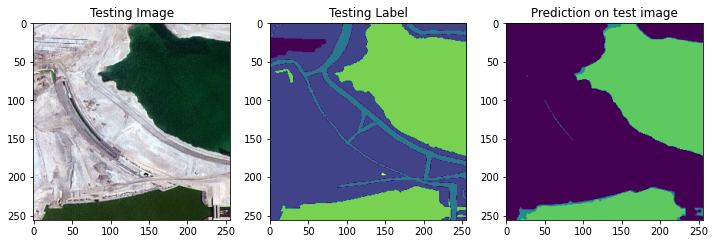

1/1 [==============================] - 0s 390ms/step


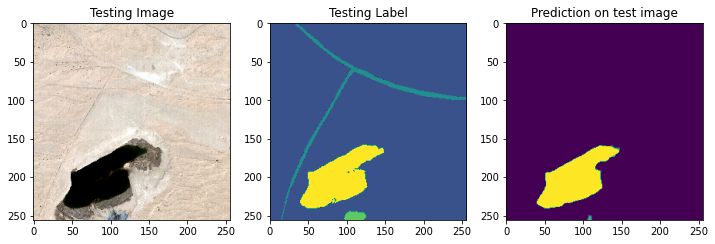

1/1 [==============================] - 0s 301ms/step


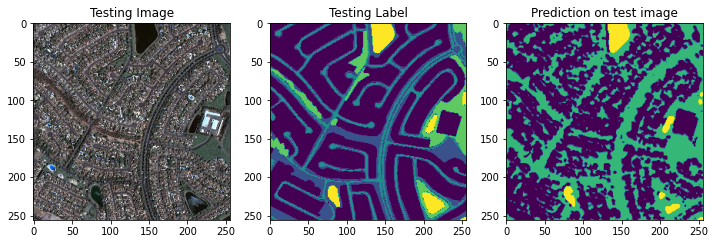

1/1 [==============================] - 0s 306ms/step


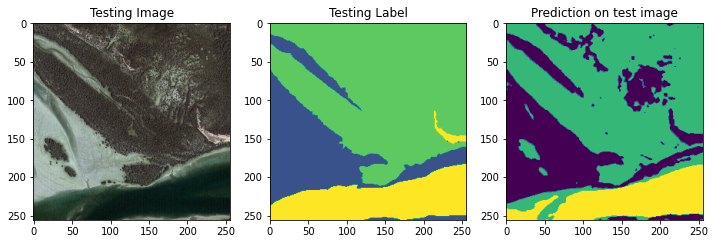

1/1 [==============================] - 0s 284ms/step


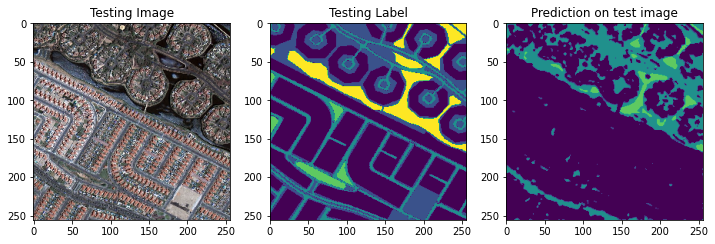

1/1 [==============================] - 0s 256ms/step


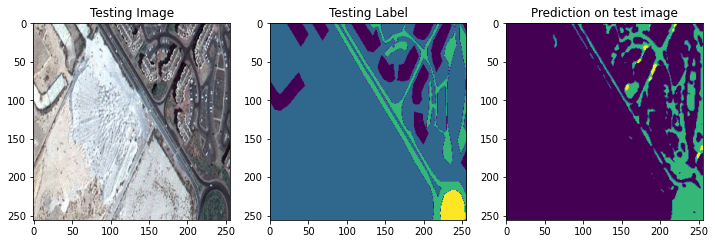

1/1 [==============================] - 0s 325ms/step


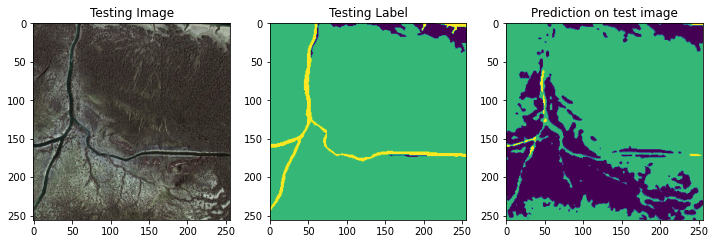

1/1 [==============================] - 0s 288ms/step


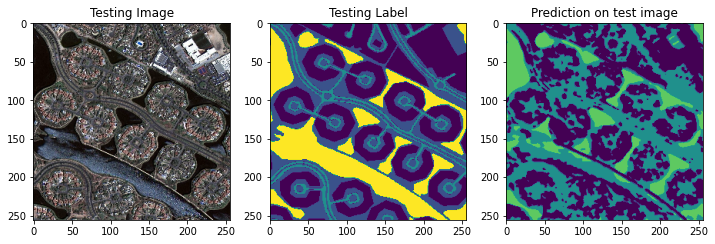

1/1 [==============================] - 0s 292ms/step


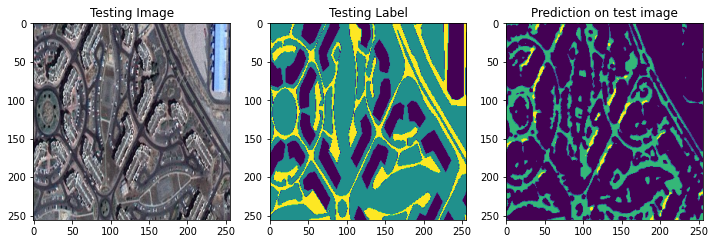

1/1 [==============================] - 0s 281ms/step


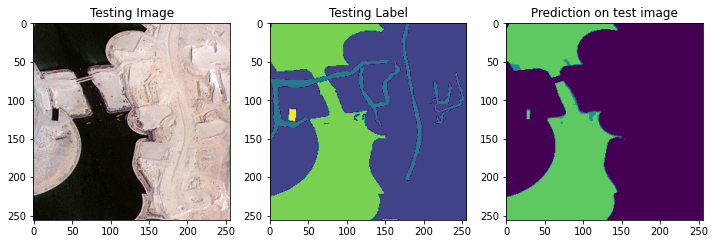

In [27]:
for i in (0, 1, 4, 5, 7, 8, 10, 11, 12, 14):
  test_img = X_test[i]
  ground_truth=y_test_argmax[i]

  test_img_input=np.expand_dims(test_img, 0)
  prediction = (model.predict(test_img_input))
  predicted_img=np.argmax(prediction, axis=3)[0,:,:]
  plt.figure(figsize=(12, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img)
  plt.subplot(232)
  plt.title('Testing Label')
  plt.imshow(ground_truth)
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(predicted_img)
  plt.show()

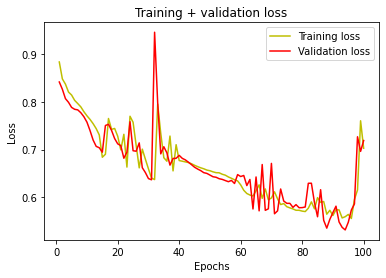

In [21]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training + validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

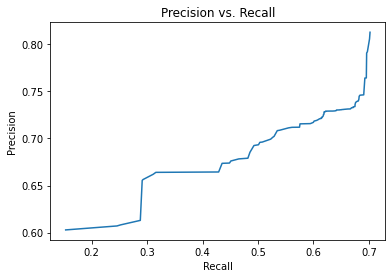

In [28]:
precision = history.history['precision_1']
recall = history.history['recall_1']
precision.sort()
recall.sort()
plt.plot(recall, precision)
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()